# The Himalayan climbers from 1905 to 2019

In [2]:
library('tidyverse')
library('ggplot2')
library('scales')
library('dplyr')
library('forcats')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.6      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [3]:
# read csv file from guithub
df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-09-22/members.csv')
df|> head()

Rows: 76519 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): expedition_id, member_id, peak_id, peak_name, season, sex, citizen...
dbl  (5): year, age, highpoint_metres, death_height_metres, injury_height_me...
lgl  (6): hired, success, solo, oxygen_used, died, injured

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


expedition_id,member_id,peak_id,peak_name,year,season,sex,age,citizenship,expedition_role,⋯,highpoint_metres,success,solo,oxygen_used,died,death_cause,death_height_metres,injured,injury_type,injury_height_metres
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,⋯,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<dbl>,<lgl>,<chr>,<dbl>
AMAD78301,AMAD78301-01,AMAD,Ama Dablam,1978,Autumn,M,40,France,Leader,⋯,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,FALSE,NA,NA
AMAD78301,AMAD78301-02,AMAD,Ama Dablam,1978,Autumn,M,41,France,Deputy Leader,⋯,6000,FALSE,FALSE,FALSE,FALSE,NA,NA,FALSE,NA,NA
AMAD78301,AMAD78301-03,AMAD,Ama Dablam,1978,Autumn,M,27,France,Climber,⋯,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,FALSE,NA,NA
AMAD78301,AMAD78301-04,AMAD,Ama Dablam,1978,Autumn,M,40,France,Exp Doctor,⋯,6000,FALSE,FALSE,FALSE,FALSE,NA,NA,FALSE,NA,NA
AMAD78301,AMAD78301-05,AMAD,Ama Dablam,1978,Autumn,M,34,France,Climber,⋯,NA,FALSE,FALSE,FALSE,FALSE,NA,NA,FALSE,NA,NA
AMAD78301,AMAD78301-06,AMAD,Ama Dablam,1978,Autumn,M,25,France,Climber,⋯,6000,FALSE,FALSE,FALSE,FALSE,NA,NA,FALSE,NA,NA


# Popular season to climb Himalayan

In [16]:
# screen data that miss value on year and season
cleaned_season = df |> 
    filter(season !=  'Unknown', year != 'Unknown')

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


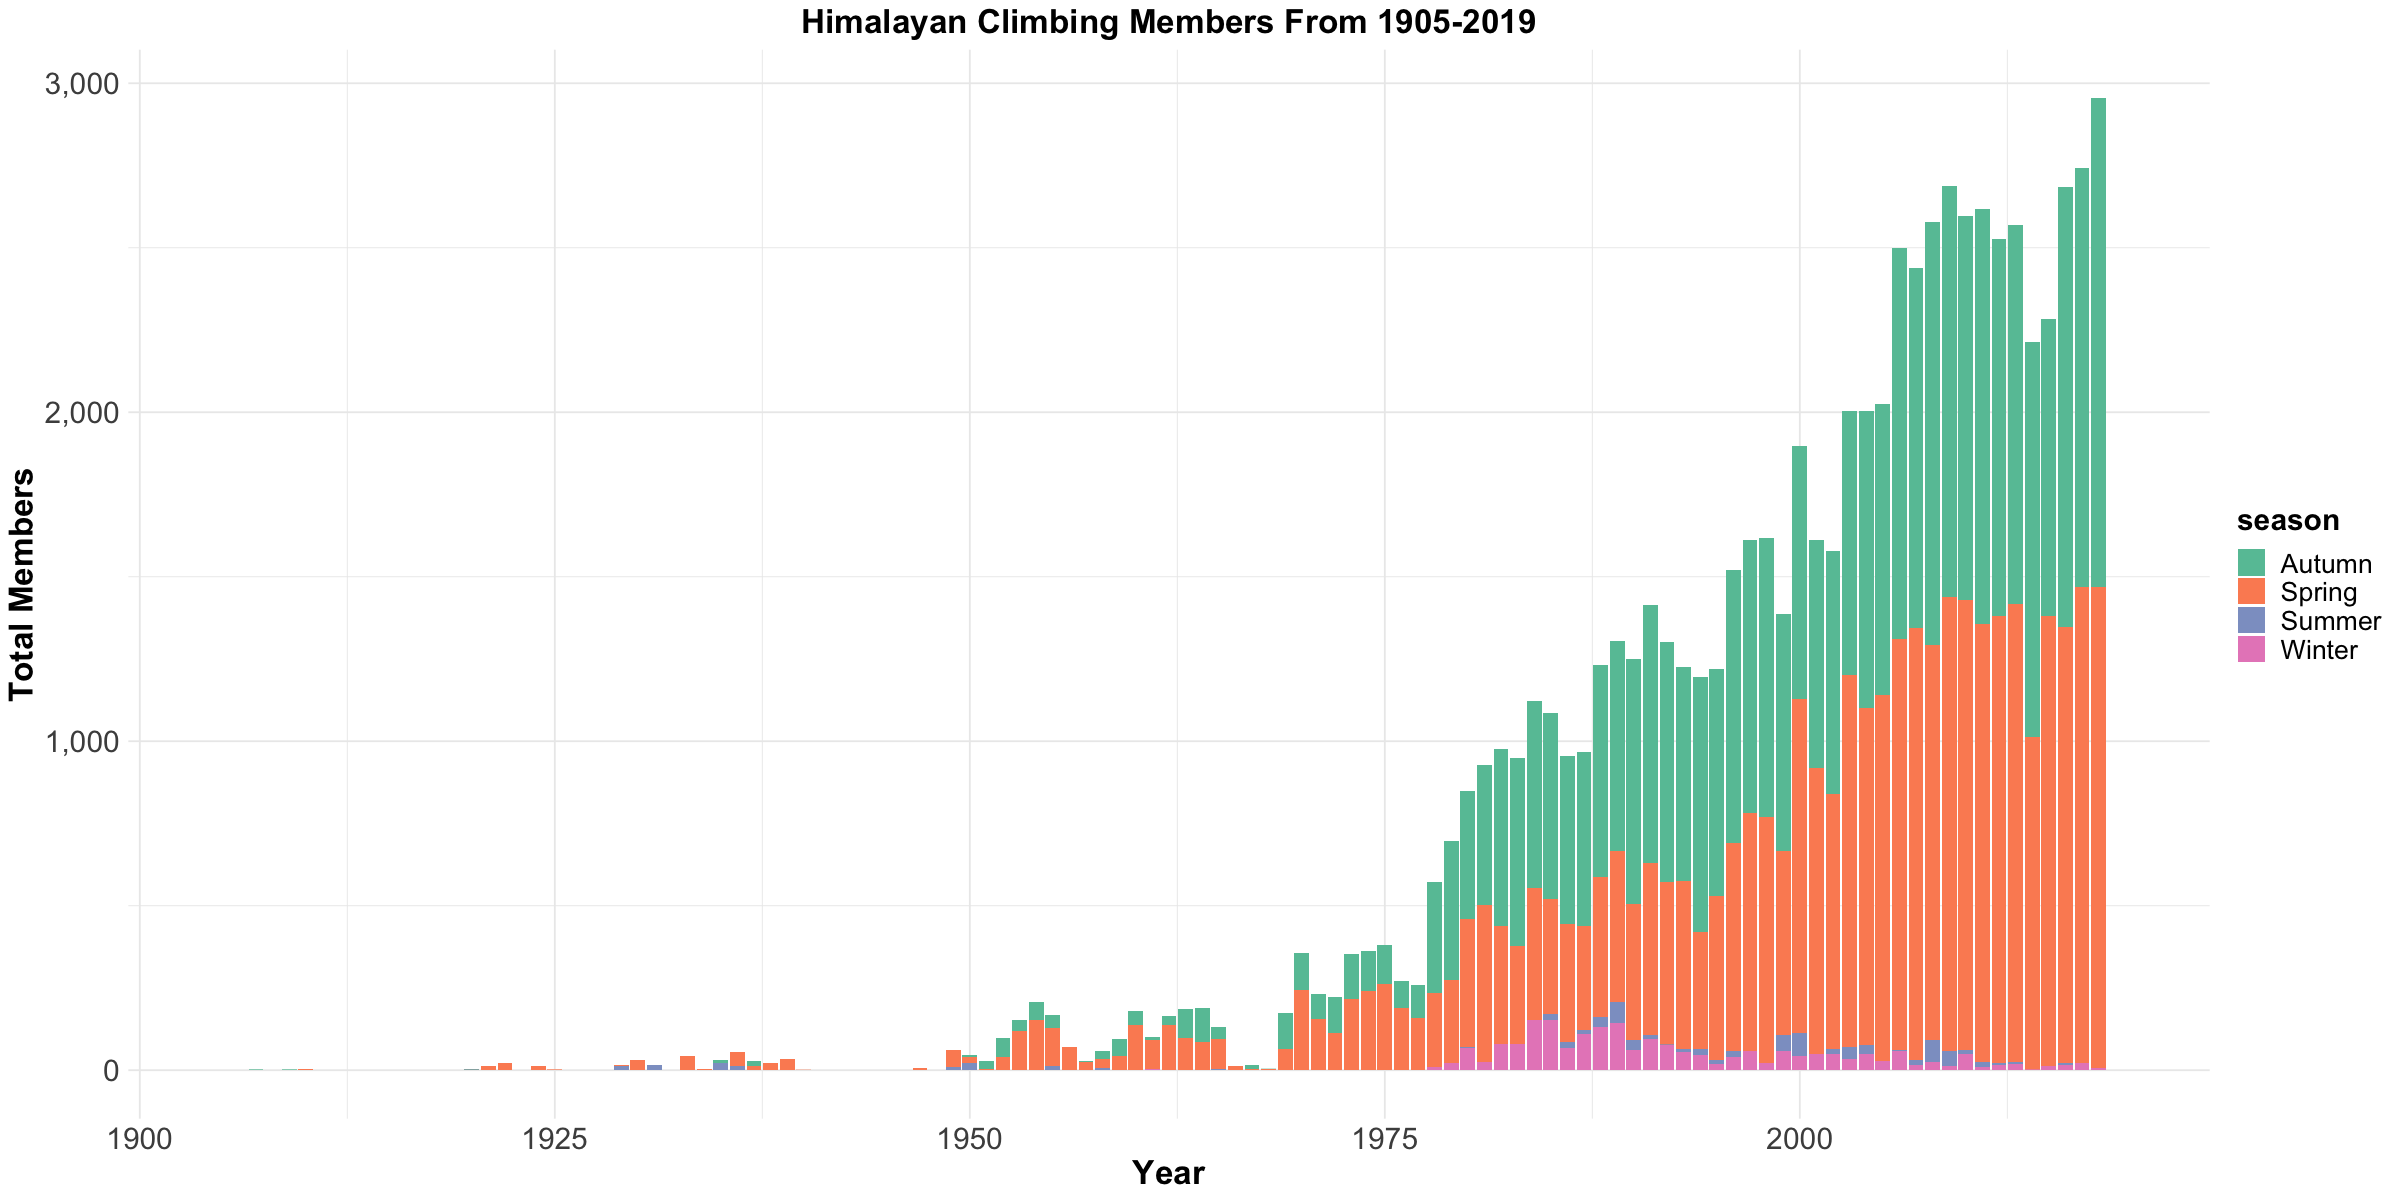

In [17]:
options(repr.plot.width = 20, repr.plot.height =10)
year_season_climb = ggplot(cleaned_season, aes(x = year,fill=season)) + 
    geom_bar() +
    scale_x_continuous(limits = c(1905,2019))+
    scale_y_continuous(labels = comma_format()) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5,size = 20, face = "bold"),
              axis.text=element_text(size=18),
              axis.title.x=element_text(size=20,face = "bold"),
              axis.title.y=element_text(size=20,face = "bold")) +
    theme(legend.text = element_text(size=16), legend.title = element_text(size=18,face = "bold")) +
    scale_fill_brewer(palette = "Set2") +
    labs(y = 'Total Members',  x = 'Year',title = 'Himalayan Climbing Members From 1905-2019')

year_season_climb

From the bar chart above, autumn and spring are popular seasons for climbing, and few members climb the Himalayas in winter and summer. Before 1975, the number of climbing in autumn and spring are mostly the same. However, after 1975, climbing the Himalayan became more popular. According to previous experience, climbing the Himalayan in autumn may be the safest, so more people choose to climb the mountain during autumn than in spring. 

# Age distribution

In [18]:
# screening valuable data
cleaned_age = cleaned_season |>
    filter(age > 0)

In [19]:
# find the median value of age 
median_values = cleaned_age |>
    group_by(year) |>
    summarize(age = median(age))

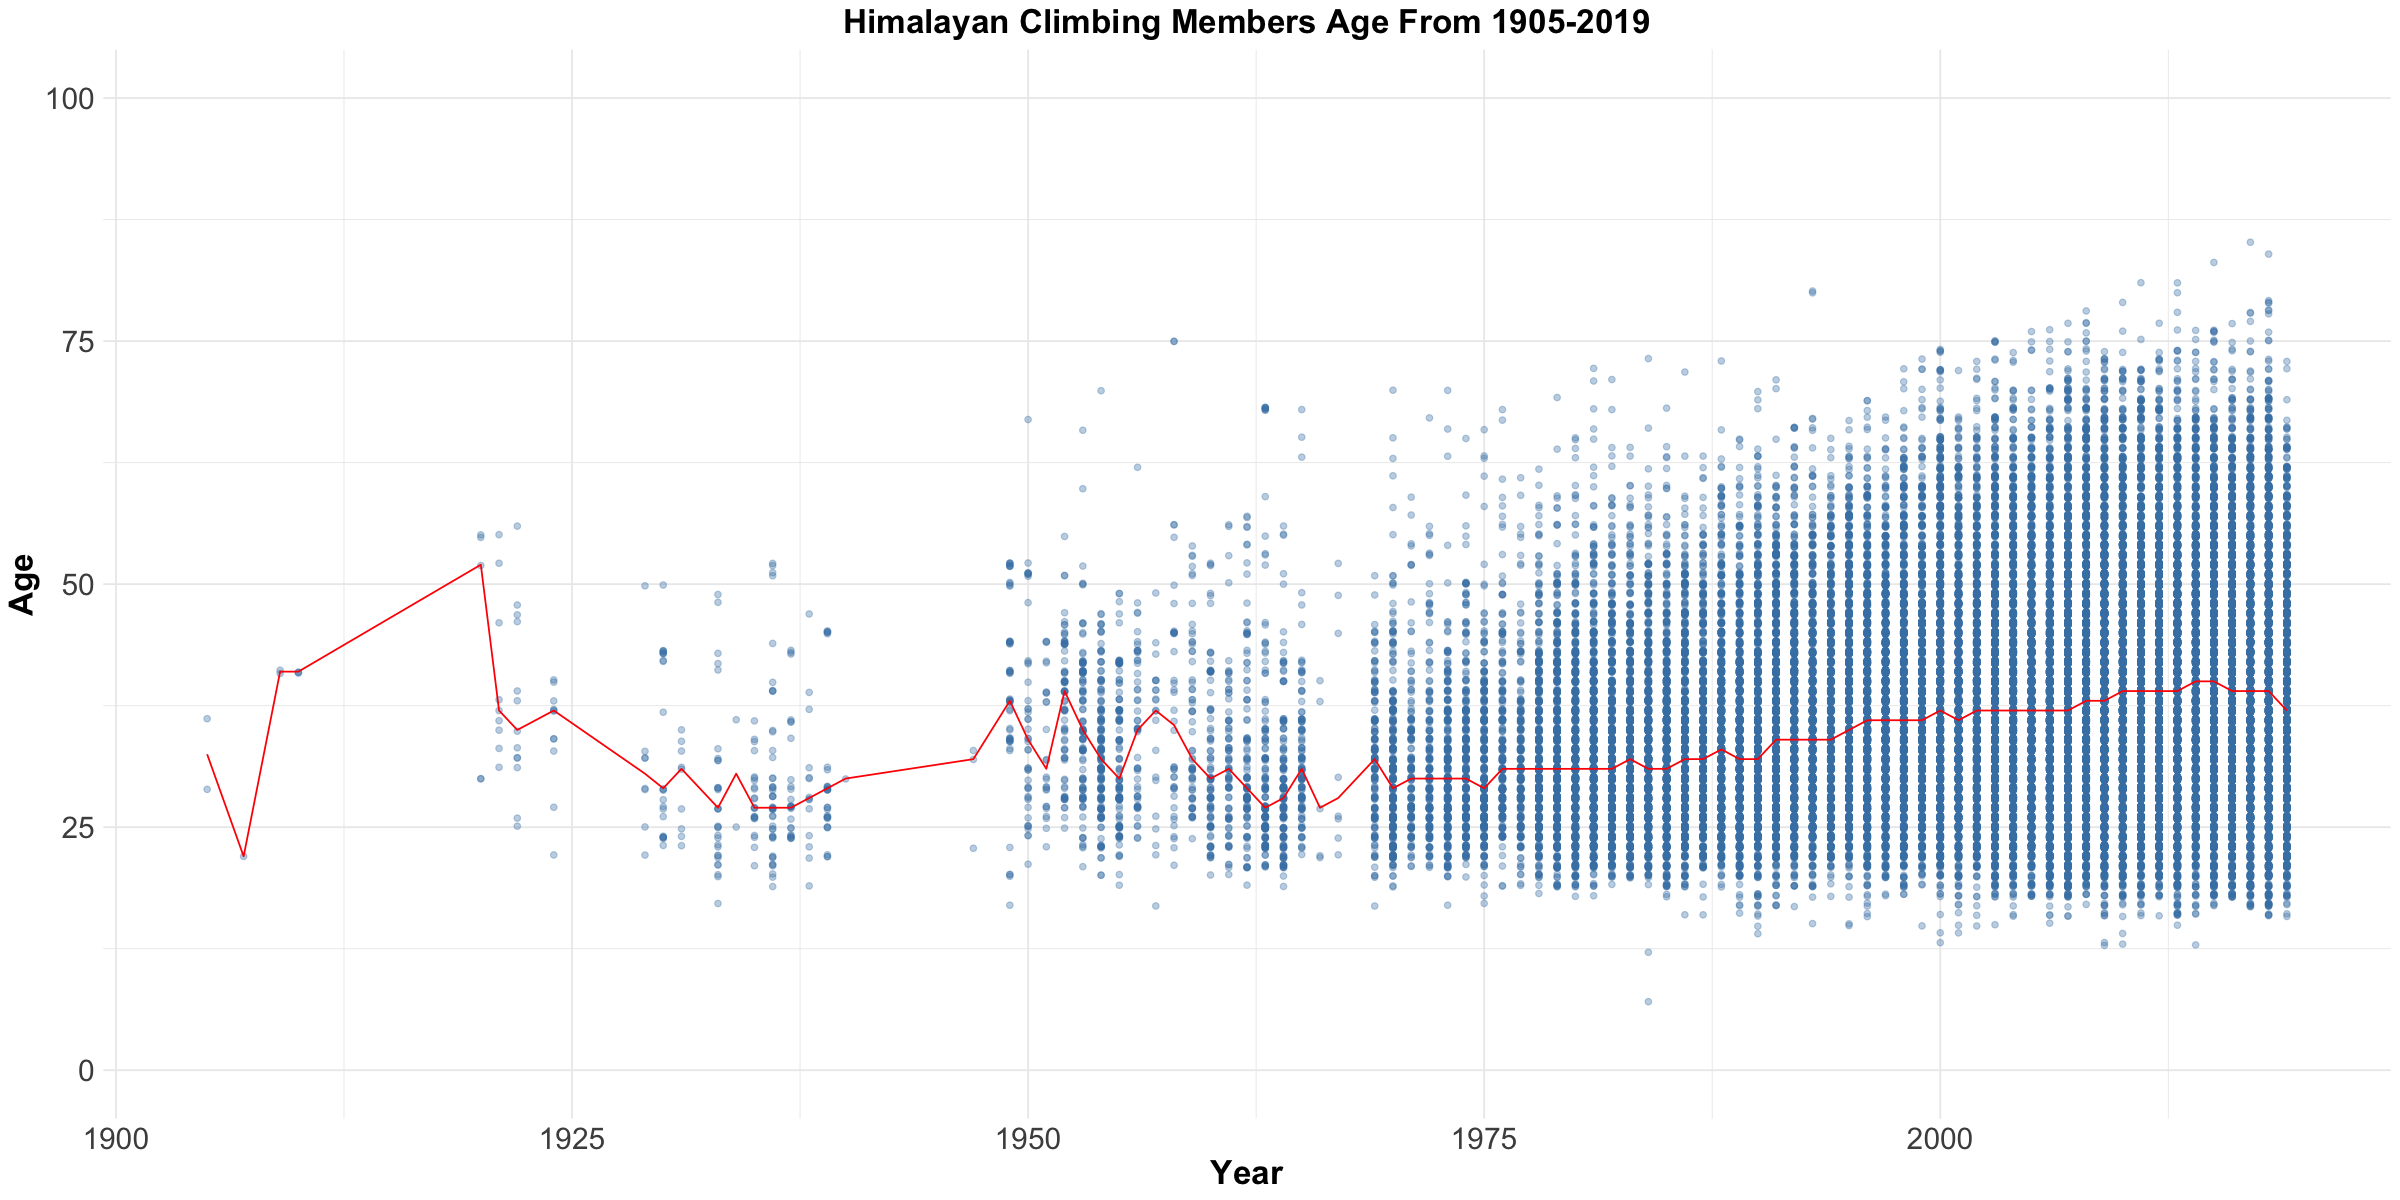

In [20]:
options(repr.plot.width = 20, repr.plot.height =10)
age_dis = ggplot(cleaned_age, aes(x = year, y = age)) + 
    geom_point(color = 'steelblue',alpha = 0.35, position = position_jitter(height = 0.2, width = 0)) +
    geom_line(color = 'red',data = median_values,mapping = aes(x= year, y = age)) +
    scale_x_continuous(limits = c(1905,2019))+
    scale_y_continuous(limits = c(0,100)) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5,size = 20, face = "bold"),
              axis.text=element_text(size=18),
              axis.title.x=element_text(size=20,face = "bold"),
              axis.title.y=element_text(size=20,face = "bold")) +
    theme(legend.text = element_text(size=16), 
          legend.title = element_text(size=18,face = "bold")) +
    scale_fill_brewer(palette = "Set2") +
    labs(y = 'Age',  x = 'Year',title = 'Himalayan Climbing Members Age From 1905-2019')


age_dis

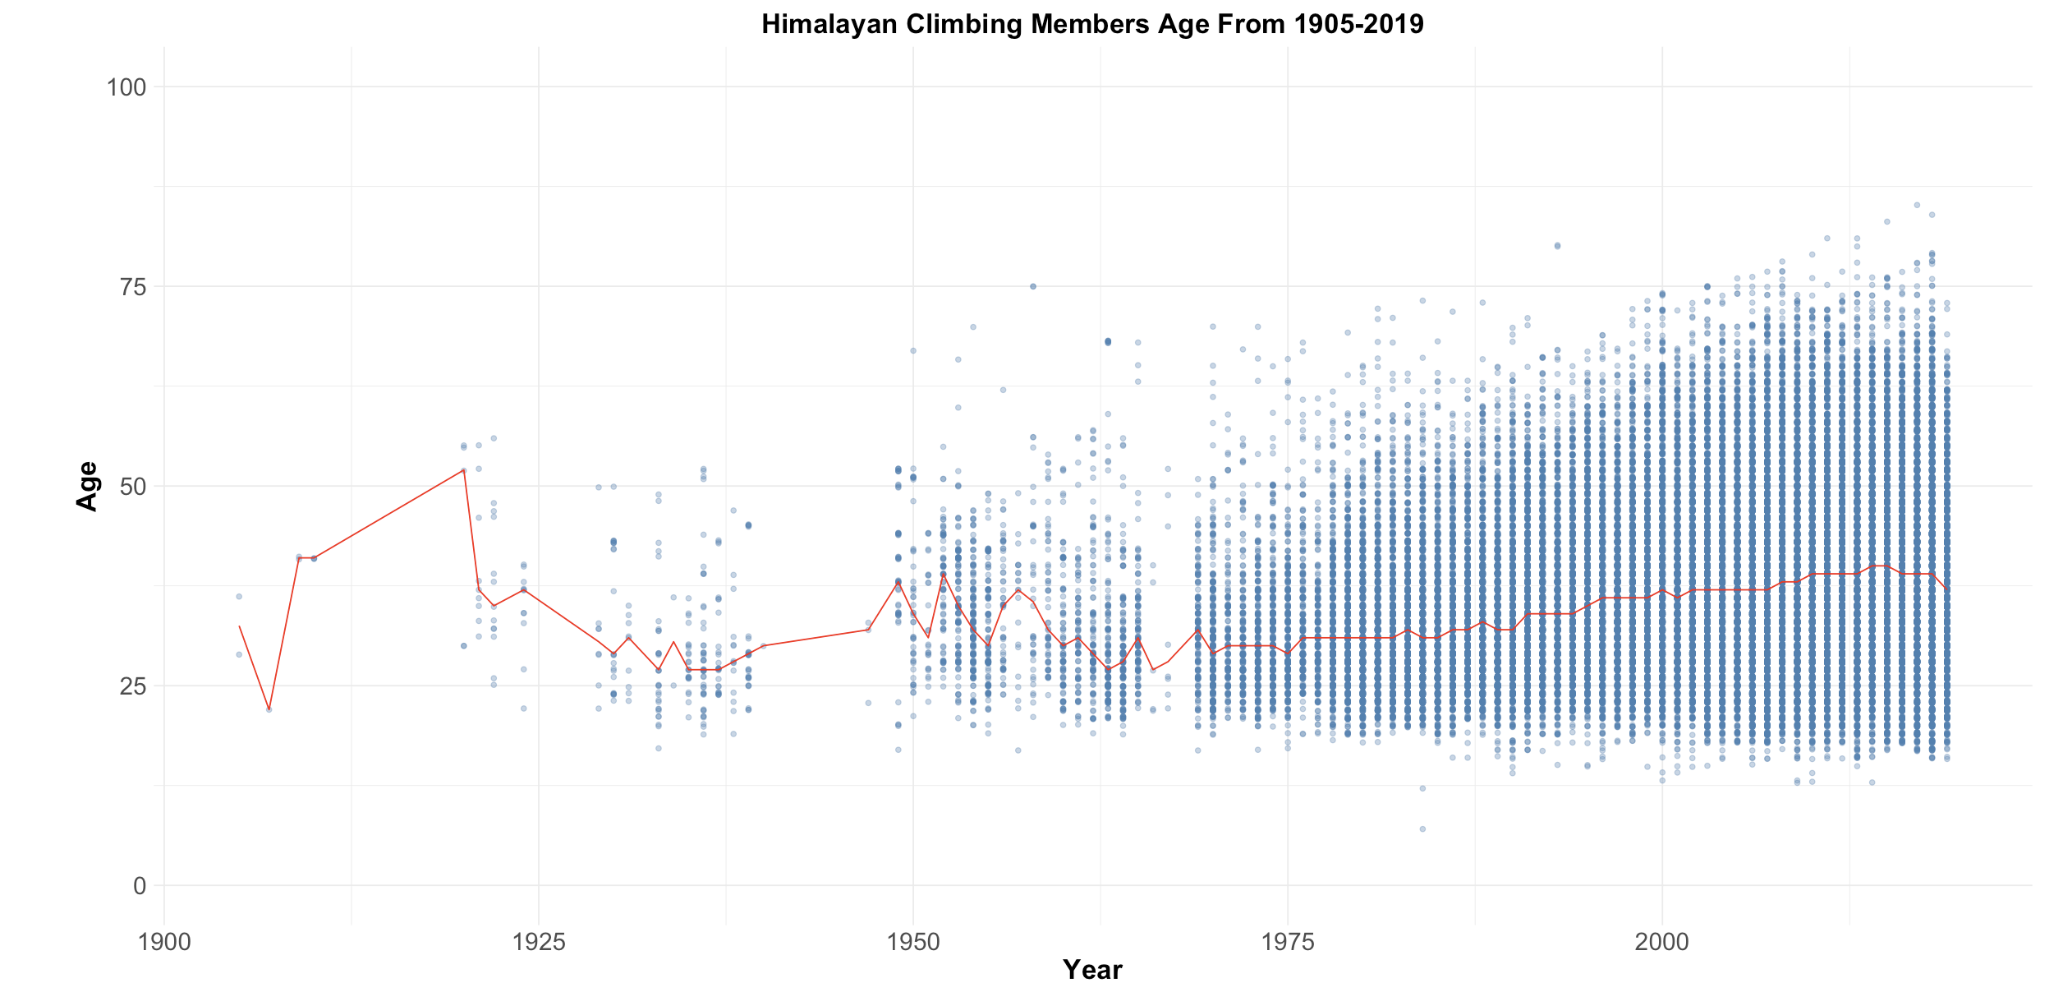

From the scatter plot above, before 1950, few people climbed the Himalayan, and their age was old. After 1950, the age distribution expands from 20 to 80, and the median age becomes stable. People from the age 25 to 30 are the most crowd who are willing to climb the Himalayan. 

# Top 10 countries members come from

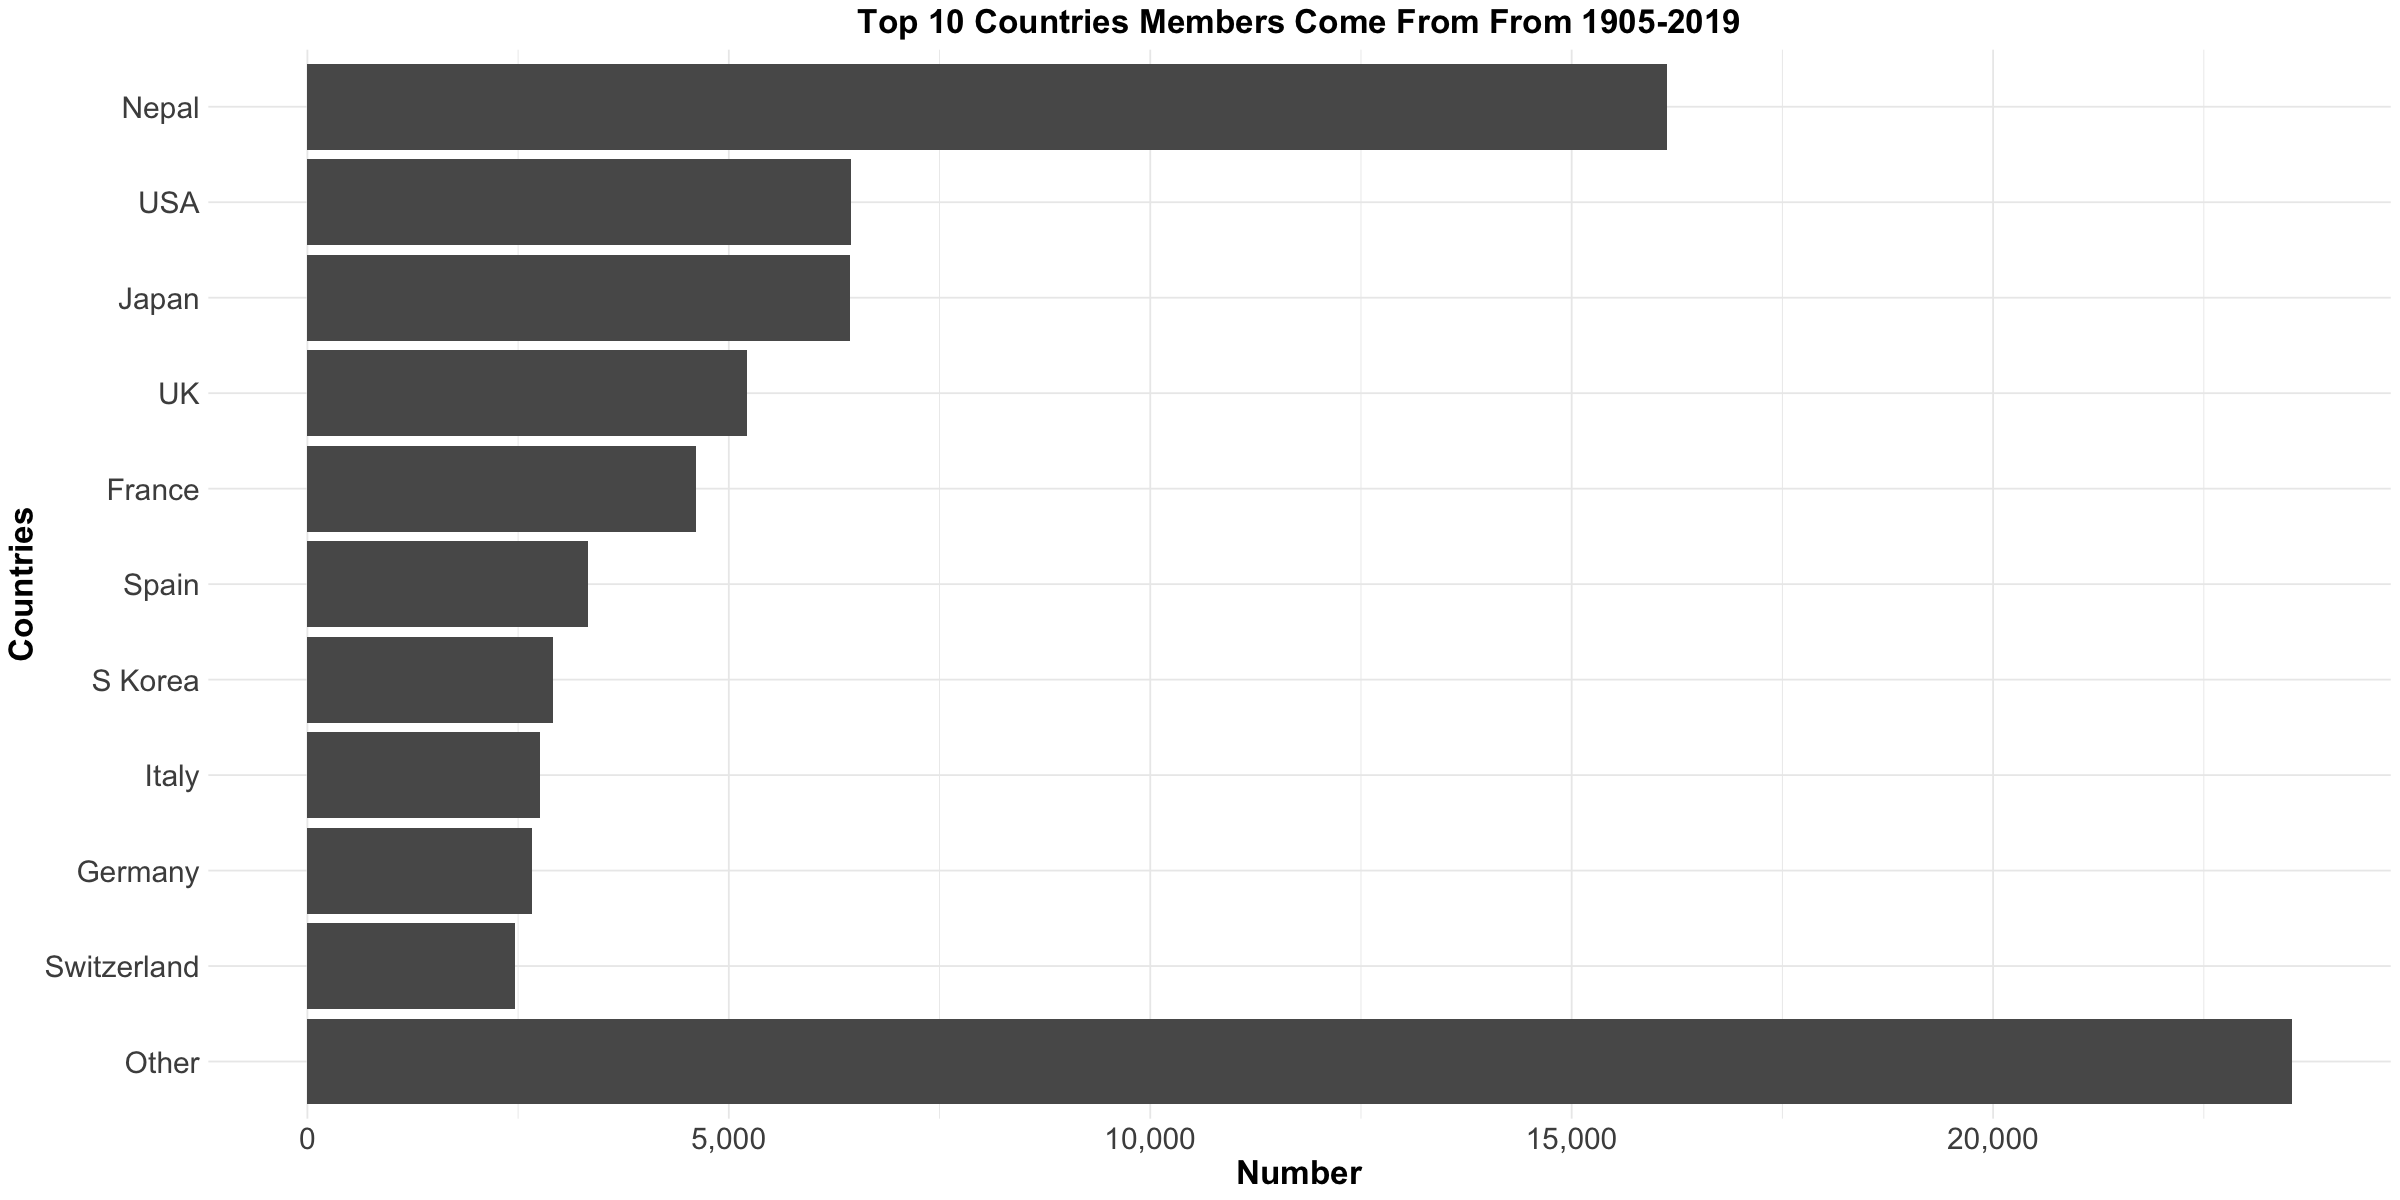

In [21]:
country = df |> 
 #only select citizenship from the dataset
    select(citizenship) |>
 # clean unvaluable data
    filter(!is.na(citizenship)) |>
 # keep top 10 countires, and other countries belong to 'Other'
    mutate(citizenship = citizenship |> 
               fct_lump(n = 10) |> 
               fct_infreq() |> 
               fct_rev() |> 
               fct_relevel('Other'))
    
p = ggplot(country, aes(y = citizenship)) + 
    geom_bar() +
    scale_x_continuous(labels = comma_format()) +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5,size = 20, face = "bold"),
              axis.text=element_text(size=18),
              axis.title.x=element_text(size=20,face = "bold"),
              axis.title.y=element_text(size=20,face = "bold")) +
    theme(legend.text = element_text(size=16), 
          legend.title = element_text(size=18,face = "bold")) +
    labs(y = 'Countries',  x = 'Number',title = 'Top 10 Countries Members Come From From 1905-2019')

           
p

As you can see from the bar chart, people from Nepal are the highest number group to climb the Himalayan from 1905 to 2019. The reason may be that Nepal is near the Himalayan, and some Nepalese are familiar with the mountain, so when people from other countries want to climb it, they will find a Nepalese to be a guide, so it increases the number of Nepalese climbing the mountain. Besides, there are 6 European countries, 1 American country, and 3 Asian countries in the top 10 countries.